***importing libraries***

In [108]:
!pip install plotly

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [62]:
#importing first dataset
covid_df=pd.read_csv(r"C:\Users\91724\Downloads\Covid-19-Data-Analysis-Project-Using-Python-And-Tableau-main\Covid-19-Data-Analysis-Project-Using-Python-And-Tableau-main\covid_19_india.csv")

In [36]:
#importing second dataset
vaccine_data=pd.read_csv(r"C:\Users\91724\Downloads\Covid-19-Data-Analysis-Project-Using-Python-And-Tableau-main\Covid-19-Data-Analysis-Project-Using-Python-And-Tableau-main\covid_vaccine_statewise.csv")

In [61]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  15086 non-null  datetime64[ns]
 1   State/UnionTerritory  15086 non-null  object        
 2   Cured                 15086 non-null  float64       
 3   Deaths                15086 non-null  float64       
 4   Confirmed             15086 non-null  float64       
 5   Active_cases          15086 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.3+ MB


In [63]:
covid_df.isnull().sum()

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [64]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [42]:
covid_df = covid_df.dropna()

In [43]:
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active_cases
15081,2021-05-19,Telangana,485644.0,3012.0,536766.0,48110.0
15082,2021-05-19,Tripura,36402.0,450.0,42776.0,5924.0
15083,2021-05-19,Uttarakhand,214426.0,5132.0,295790.0,76232.0
15084,2021-05-19,Uttar Pradesh,1483249.0,18072.0,1637663.0,136342.0
15085,2021-05-19,West Bengal,1026492.0,13576.0,1171861.0,131793.0


In [50]:
covid_df.loc[:, 'Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
15081,2021-05-19,Telangana,485644.0,3012.0,536766.0,48110.0
15082,2021-05-19,Tripura,36402.0,450.0,42776.0,5924.0
15083,2021-05-19,Uttarakhand,214426.0,5132.0,295790.0,76232.0
15084,2021-05-19,Uttar Pradesh,1483249.0,18072.0,1637663.0,136342.0
15085,2021-05-19,West Bengal,1026492.0,13576.0,1171861.0,131793.0


In [51]:
#creating pivot table for the first dataset in statewise manner
statewise=pd.pivot_table(covid_df,values=["Cured","Deaths","Confirmed"],index="State/UnionTerritory",aggfunc=max)
statewise["recovery_rate"]=statewise["Cured"]*100/statewise["Confirmed"]
statewise["mortality_rate"]=statewise["Deaths"]*100/statewise["Confirmed"]
statewise=statewise.sort_values(by="Confirmed",ascending=False)
statewise.style.background_gradient(cmap="cubehelix")


C:\Users\91724\AppData\Local\Temp\ipykernel_22252\1987919949.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise=pd.pivot_table(covid_df,values=["Cured","Deaths","Confirmed"],index="State/UnionTerritory",aggfunc=max)


,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


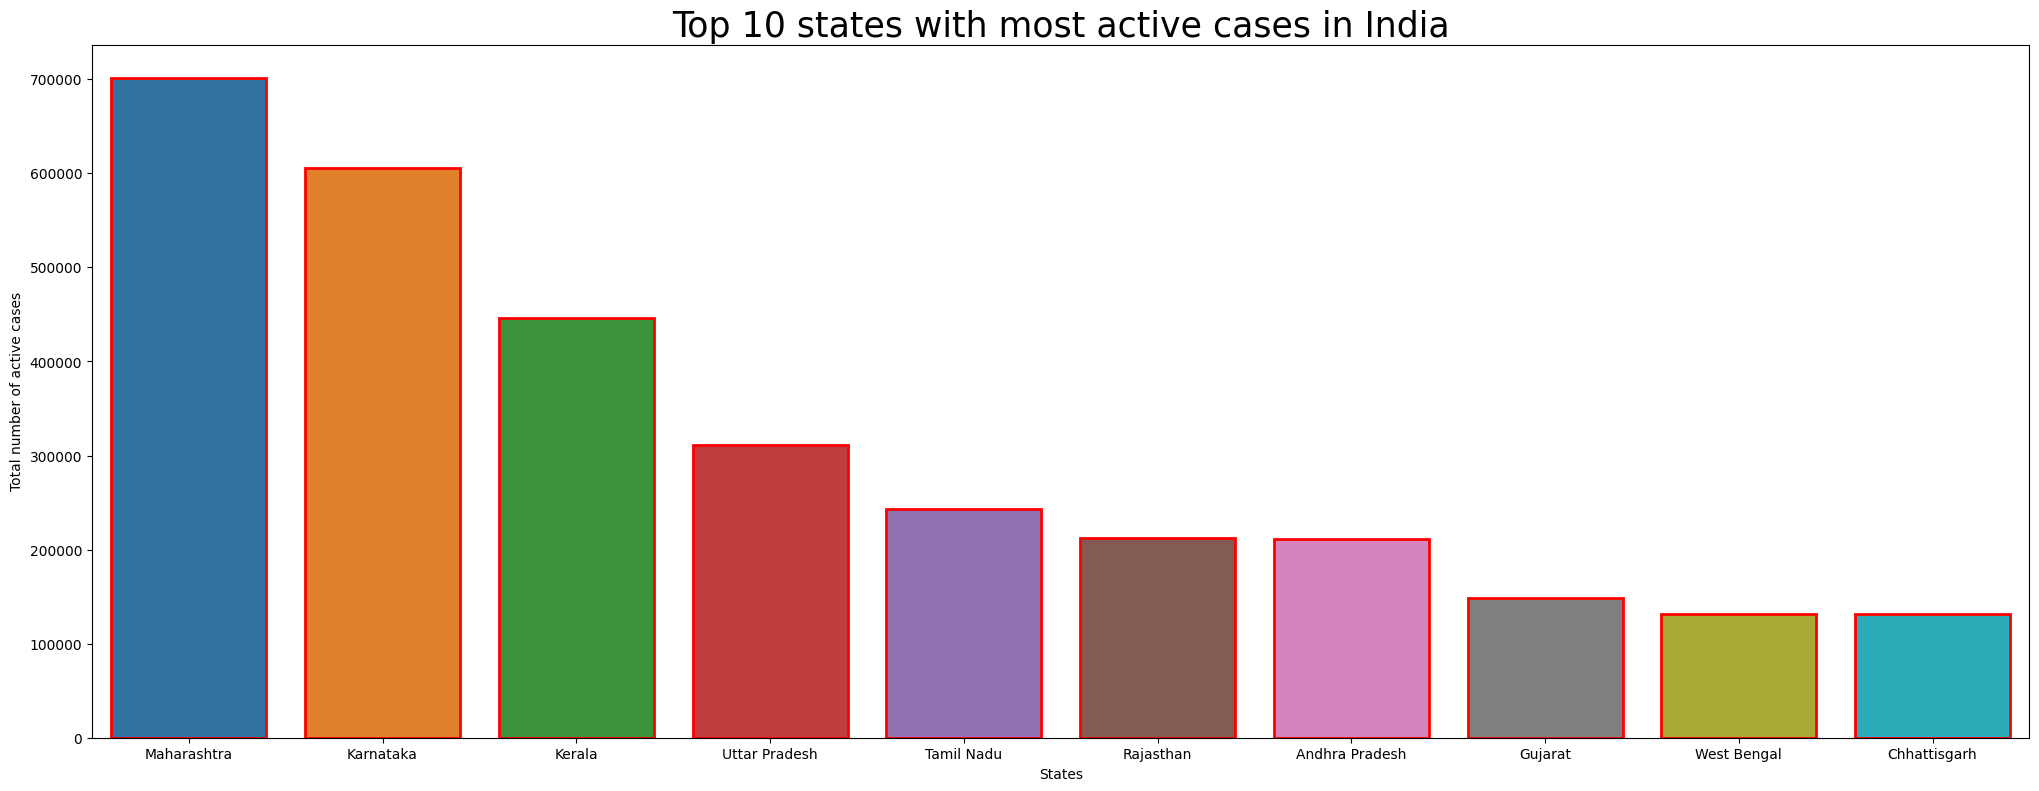

In [58]:
#Top 10 active cases states 
top_10_active_cases = covid_df.groupby(by='State/UnionTerritory')[['Active_cases', 'Date']].max().reset_index()
top_10_active_cases = top_10_active_cases.sort_values(by='Active_cases', ascending=False)
plt.figure(figsize=(25,9))
plt.title("Top 10 states with most active cases in India",size=25)
plt.xlabel("States")
plt.ylabel("Total number of active cases")
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_cases",x="State/UnionTerritory",linewidth=2,edgecolor='red',hue='State/UnionTerritory')
plt.show()
                                          
                                          

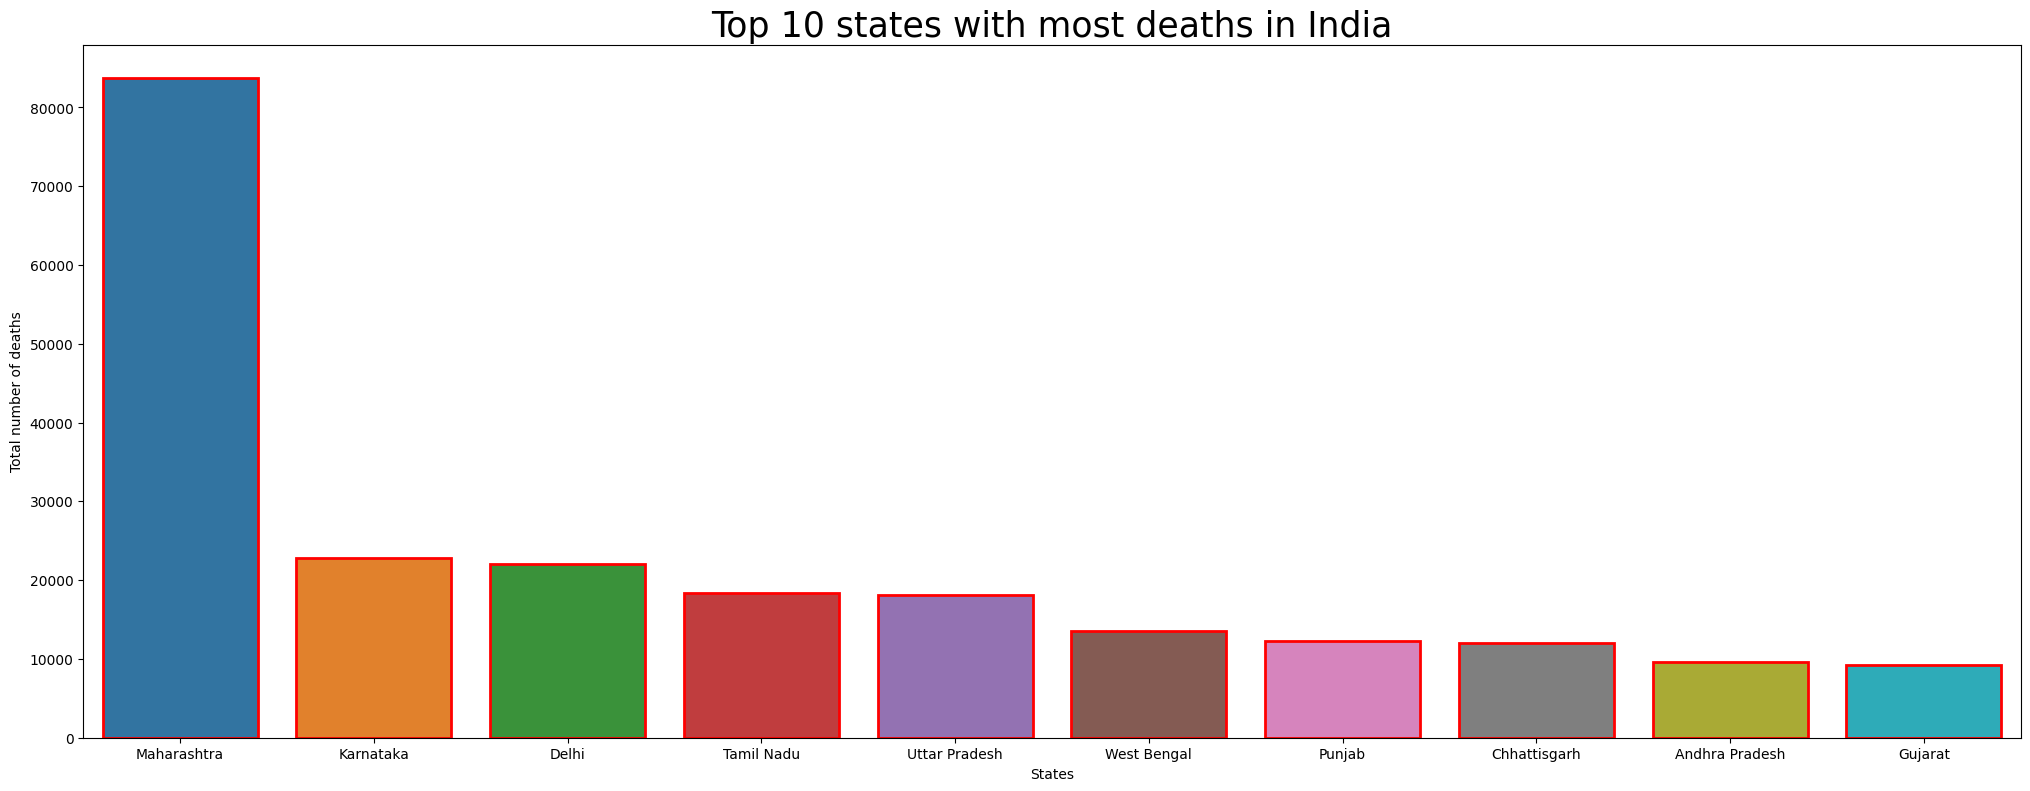

In [60]:
#Top 10 states with highest deaths
top_10_deaths = covid_df.groupby(by='State/UnionTerritory')[['Deaths', 'Date']].max().reset_index()
top_10_deaths = top_10_deaths.sort_values(by='Deaths', ascending=False)
plt.figure(figsize=(25,9))
plt.title("Top 10 states with most deaths in India",size=25)
plt.xlabel("States")
plt.ylabel("Total number of deaths")
ax=sns.barplot(data=top_10_deaths.iloc[:10],y="Deaths",x="State/UnionTerritory",linewidth=2,edgecolor='red',hue='State/UnionTerritory')
plt.show()


In [71]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


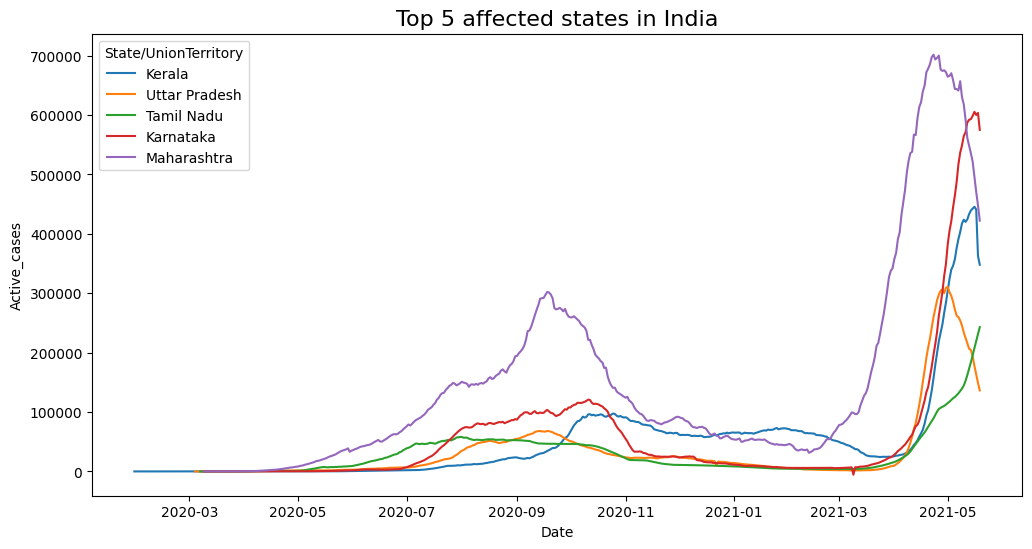

In [74]:
# Growth trend for active cases
covid_df.loc[:, 'Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')
fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],
                 x='Date', y='Active_cases', hue='State/UnionTerritory')
ax.set_title("Top 5 affected states in India", size=16)
plt.show()
                

In [75]:
vaccine_data.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [76]:
vaccine_data.rename(columns={'Updated On':'Vaccine_date'},inplace=True)

In [77]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [84]:
vaccine_data.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [82]:
#to remove these columns 
vaccination=vaccine_data.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [85]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


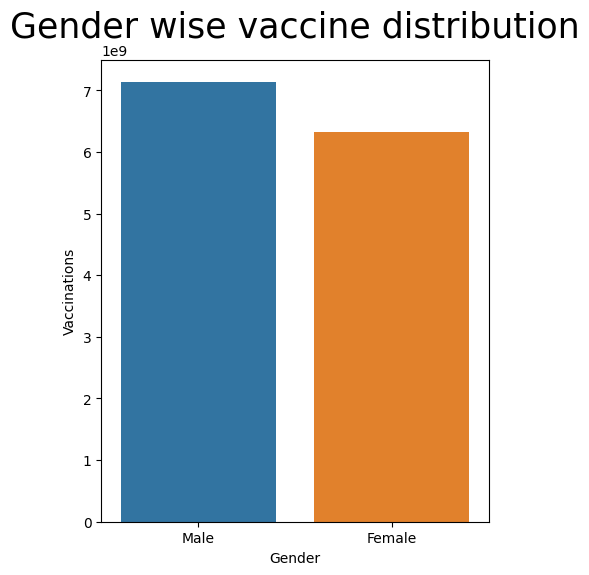

In [123]:
#Gender vise vaccine distribution
import seaborn as sns
import matplotlib.pyplot as plt

vaccination=vaccine_data.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)


male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()


bar_data = {'Gender': ['Male', 'Female'], 'Vaccinations': [male, female]}
bar_df = pd.DataFrame(bar_data)

plt.figure(figsize=(5,6))
plt.title("Gender wise vaccine distribution",size=25)



ax = sns.barplot(x='Gender', y='Vaccinations', data=bar_df,hue='Gender')

plt.show()

In [92]:
#remove rows where state is india
vaccine=vaccine_data[vaccine_data.State!='India']
vaccine

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)
vaccine.head()

C:\Users\91724\AppData\Local\Temp\ipykernel_22252\3613350534.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [97]:
#most vaccinated state
max_vac=vaccine.groupby(by='State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac


,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


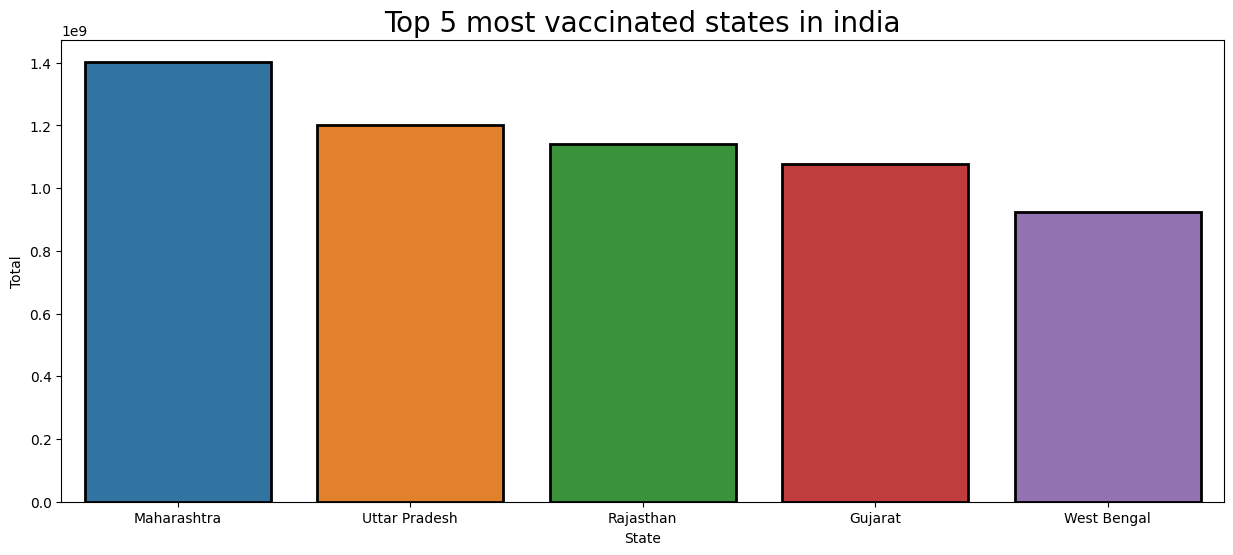

In [102]:
fig=plt.figure(figsize=(15,6))
plt.title("Top 5 most vaccinated states in india",size=20)
x=sns.barplot(data=max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='black',hue='State')
plt.xlabel='States'
plt.ylabel='Vaccinations'
plt.show()

In [104]:
#least vaccinated state
min_vac=vaccine.groupby(by='State')['Total'].sum().to_frame('Total')
min_vac=max_vac.sort_values('Total',ascending=True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


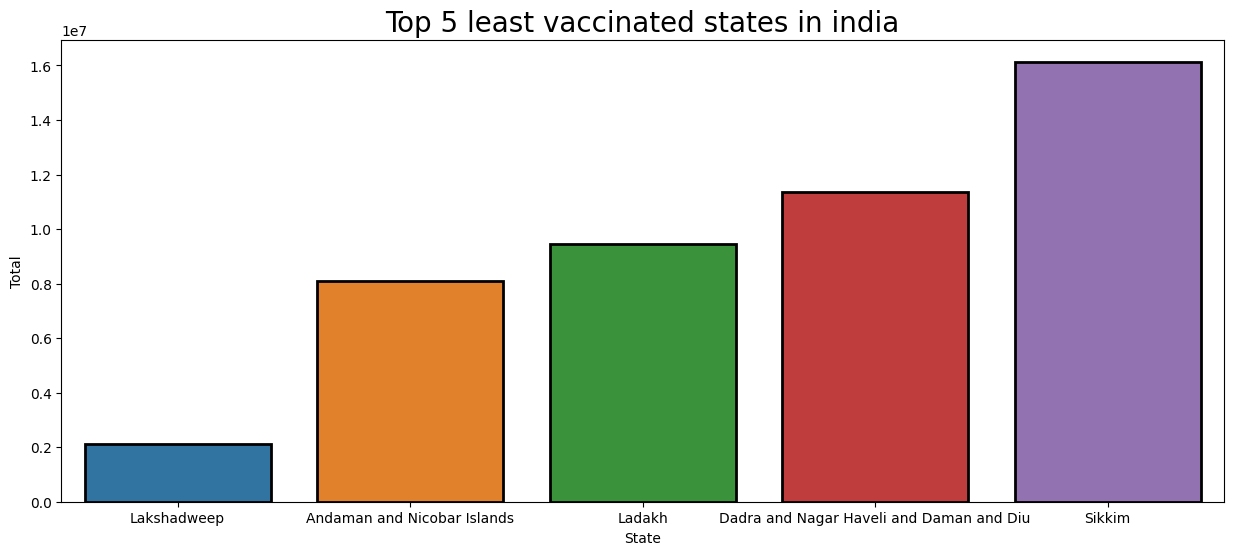

In [105]:
fig=plt.figure(figsize=(15,6))
plt.title("Top 5 least vaccinated states in india",size=20)
x=sns.barplot(data=min_vac.iloc[:10],y=min_vac.Total,x=min_vac.index,linewidth=2,edgecolor='black',hue='State')
plt.xlabel='States'
plt.ylabel='Vaccinations'
plt.show()